## Importing all the required libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
train = pd.read_csv('../data/lkart/train.csv')
test = pd.read_csv('../data/lkart/test.csv')

## EDA

In [130]:
train.shape

(40705, 21)

In [131]:
test.shape

(9295, 20)

In [132]:
train.columns

Index(['transaction_id', 'days_since_account_opening',
       'total_transaction_amount', 'processing_charge',
       'data_packets_exchange_frequency', 'ip_address', 'user_device',
       'domain', 'transaction_city', 'transaction_pin_code',
       'transaction_state', 'account_balance_limit', 'currency',
       'requested_authentication', 'transaction_type', 'transaction_category',
       'transaction_timestamp', 'transaction_time(mins)',
       'days_since_last_login', 'single_transaction_max_limit', 'is_fraud'],
      dtype='object')

In [133]:
train.head()

,transaction_id,days_since_account_opening,total_transaction_amount,processing_charge,data_packets_exchange_frequency,ip_address,user_device,domain,transaction_city,transaction_pin_code,...,account_balance_limit,currency,requested_authentication,transaction_type,transaction_category,transaction_timestamp,transaction_time(mins),days_since_last_login,single_transaction_max_limit,is_fraud
0,TR_8845,4981.0,1917.854,47.779,5188.0,130.168.168.109,Mozilla/5.0 (Macintosh; PPC Mac OS X 10 6_1; r...,hernandezcom,Baileytown,54133.0,...,59125.681,usd,0.0,Insurance Premium,International,2020-10-31 07:00:14,2.233,97.0,7973.168000000001,0
1,TR_28089,5516.0,3881.569,82.824,6704.0,116.254.133.63,Mozilla/5.0 (Windows; U; Windows 98) AppleWebK...,fryecom,West Julie,62799.0,...,$&%$,cad,NaN,Bill Payment,International,2021-08-24 19:43:58,0.723,38.0,9262.768,0
2,TR_39517,4893.0,2995.472,72.710,5217.0,113.125.149.223,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_7 ...,hicks.net,New Elizabeth,56643.0,...,38192.604,cad,0.0,Ecommerce,International,2021-01-08 03:36:31,1.329,45.0,12486.983999999999,0
3,TR_30045,2297.0,1819.151,59.894,2698.0,142.1.113.242,Mozilla/5.0 (Windows NT 6.1; fil-PH; rv:1.9.1....,garciacom,South Curtisville,34578.0,...,72827.407,cad,NaN,Insurance Premium,International,2021-02-15 17:17:22,1.924,78.0,14957.028999999999,1
4,TR_25864,NAT,1311.352,56.689,4531.0,51.224.152.133,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10 5_0...,campbellinfo,Coxmouth,50426.0,...,38599.68,eur,NaN,Betting,Domestic,2021-08-29 02:00:17,0.425,43.0,10458.058,0


In [134]:
train['currency'].unique()

array(['usd', 'cad', 'eur', nan], dtype=object)

In [135]:
test['currency'].unique()

array(['cad', 'usd', 'eur', nan], dtype=object)

In [136]:
train['transaction_type'].unique()

array(['Insurance Premium', 'Bill Payment', 'Ecommerce', 'Betting',
       'Unknown', 'Grocery Shopping', nan, 'NA#@^666'], dtype=object)

In [137]:
test['transaction_type'].unique()

array(['Ecommerce', 'Grocery Shopping', 'Insurance Premium',
       'Bill Payment', 'Betting', 'Unknown', nan, 'NA#@^666'],
      dtype=object)

In [138]:
train.columns 

Index(['transaction_id', 'days_since_account_opening',
       'total_transaction_amount', 'processing_charge',
       'data_packets_exchange_frequency', 'ip_address', 'user_device',
       'domain', 'transaction_city', 'transaction_pin_code',
       'transaction_state', 'account_balance_limit', 'currency',
       'requested_authentication', 'transaction_type', 'transaction_category',
       'transaction_timestamp', 'transaction_time(mins)',
       'days_since_last_login', 'single_transaction_max_limit', 'is_fraud'],
      dtype='object')

In [139]:
train.isnull().sum()

transaction_id                         0
days_since_account_opening           596
total_transaction_amount              35
processing_charge                     40
data_packets_exchange_frequency       29
ip_address                            33
user_device                           34
domain                                 0
transaction_city                      36
transaction_pin_code                  30
transaction_state                     29
account_balance_limit                441
currency                              25
requested_authentication           13555
transaction_type                     683
transaction_category                 599
transaction_timestamp                 32
transaction_time(mins)                89
days_since_last_login               1029
single_transaction_max_limit         239
is_fraud                               0
dtype: int64

In [140]:
drop_columns = ['transaction_id','ip_address','user_device','domain','transaction_city','transaction_pin_code','transaction_state','requested_authentication','transaction_timestamp']

train.drop(columns= drop_columns, inplace=True)
test.drop(columns= drop_columns, inplace=True)


In [141]:
train.columns

Index(['days_since_account_opening', 'total_transaction_amount',
       'processing_charge', 'data_packets_exchange_frequency',
       'account_balance_limit', 'currency', 'transaction_type',
       'transaction_category', 'transaction_time(mins)',
       'days_since_last_login', 'single_transaction_max_limit', 'is_fraud'],
      dtype='object')

In [142]:
for items in train.columns:
    if train[items].dtypes == 'O':
        print(items)

days_since_account_opening
account_balance_limit
currency
transaction_type
transaction_category
days_since_last_login
single_transaction_max_limit


In [143]:
train.head()

,days_since_account_opening,total_transaction_amount,processing_charge,data_packets_exchange_frequency,account_balance_limit,currency,transaction_type,transaction_category,transaction_time(mins),days_since_last_login,single_transaction_max_limit,is_fraud
0,4981.0,1917.854,47.779,5188.0,59125.681,usd,Insurance Premium,International,2.233,97.0,7973.168000000001,0
1,5516.0,3881.569,82.824,6704.0,$&%$,cad,Bill Payment,International,0.723,38.0,9262.768,0
2,4893.0,2995.472,72.710,5217.0,38192.604,cad,Ecommerce,International,1.329,45.0,12486.983999999999,0
3,2297.0,1819.151,59.894,2698.0,72827.407,cad,Insurance Premium,International,1.924,78.0,14957.028999999999,1
4,NAT,1311.352,56.689,4531.0,38599.68,eur,Betting,Domestic,0.425,43.0,10458.058,0


In [144]:
train['days_since_account_opening'] = pd.to_numeric(train['days_since_account_opening'], errors='coerce')
train['account_balance_limit'] = pd.to_numeric(train['account_balance_limit'], errors='coerce')
train['days_since_last_login'] = pd.to_numeric(train['days_since_last_login'], errors='coerce')
train['single_transaction_max_limit'] = pd.to_numeric(train['single_transaction_max_limit'], errors='coerce')


In [145]:
train.head()

,days_since_account_opening,total_transaction_amount,processing_charge,data_packets_exchange_frequency,account_balance_limit,currency,transaction_type,transaction_category,transaction_time(mins),days_since_last_login,single_transaction_max_limit,is_fraud
0,4981.0,1917.854,47.779,5188.0,59125.681,usd,Insurance Premium,International,2.233,97.0,7973.168,0
1,5516.0,3881.569,82.824,6704.0,NaN,cad,Bill Payment,International,0.723,38.0,9262.768,0
2,4893.0,2995.472,72.710,5217.0,38192.604,cad,Ecommerce,International,1.329,45.0,12486.984,0
3,2297.0,1819.151,59.894,2698.0,72827.407,cad,Insurance Premium,International,1.924,78.0,14957.029,1
4,NaN,1311.352,56.689,4531.0,38599.680,eur,Betting,Domestic,0.425,43.0,10458.058,0


In [146]:
test['days_since_account_opening'] = pd.to_numeric(test['days_since_account_opening'], errors='coerce')
test['account_balance_limit'] = pd.to_numeric(test['account_balance_limit'], errors='coerce')
test['days_since_last_login'] = pd.to_numeric(test['days_since_last_login'], errors='coerce')
test['single_transaction_max_limit'] = pd.to_numeric(test['single_transaction_max_limit'], errors='coerce')

In [147]:
test.head()

,days_since_account_opening,total_transaction_amount,processing_charge,data_packets_exchange_frequency,account_balance_limit,currency,transaction_type,transaction_category,transaction_time(mins),days_since_last_login,single_transaction_max_limit
0,5898.0,3351.186,68.485,5032.0,41981.132,cad,Ecommerce,International,0.470,68.0,2286.460
1,5603.0,2943.762,50.556,5496.0,37890.234,usd,Grocery Shopping,Domestic,0.204,83.0,16786.775
2,3997.0,1918.628,59.885,4069.0,38921.761,cad,Insurance Premium,Domestic,2.123,27.0,4867.169
3,5354.0,2999.034,54.533,6994.0,48328.430,cad,Ecommerce,International,0.820,96.0,6204.374
4,3422.0,2149.749,52.917,2212.0,NaN,cad,Bill Payment,Domestic,1.839,90.0,NaN


In [148]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [149]:
train_null = train.isnull().sum().reset_index()
train_null.columns = ['columns','values']

train_null_cols_list = train_null[train_null['values'] > 0 ]['columns'].to_list()

In [150]:
test_null = test.isnull().sum().reset_index()
test_null.columns = ['columns','values']

test_null_cols_list = test_null[test_null['values'] > 0 ]['columns'].to_list()

In [151]:
print(train_null_cols_list)
print(test_null_cols_list)

['days_since_account_opening', 'total_transaction_amount', 'processing_charge', 'data_packets_exchange_frequency', 'account_balance_limit', 'currency', 'transaction_type', 'transaction_category', 'transaction_time(mins)', 'days_since_last_login', 'single_transaction_max_limit']
['days_since_account_opening', 'total_transaction_amount', 'processing_charge', 'data_packets_exchange_frequency', 'account_balance_limit', 'currency', 'transaction_type', 'transaction_category', 'transaction_time(mins)', 'days_since_last_login', 'single_transaction_max_limit']


In [152]:
def train_null_imputer(list):
    for items in list:
        train[items] = imputer.fit_transform(train[items].values.reshape(-1,1))


def test_null_imputer(list):
    for items in list:
        test[items] = imputer.fit_transform(test[items].values.reshape(-1,1))


train_null_imputer(train_null_cols_list)
test_null_imputer(test_null_cols_list)



In [153]:
test.isnull().sum()

days_since_account_opening         0
total_transaction_amount           0
processing_charge                  0
data_packets_exchange_frequency    0
account_balance_limit              0
currency                           0
transaction_type                   0
transaction_category               0
transaction_time(mins)             0
days_since_last_login              0
single_transaction_max_limit       0
dtype: int64

In [154]:
train.isnull().sum()

days_since_account_opening         0
total_transaction_amount           0
processing_charge                  0
data_packets_exchange_frequency    0
account_balance_limit              0
currency                           0
transaction_type                   0
transaction_category               0
transaction_time(mins)             0
days_since_last_login              0
single_transaction_max_limit       0
is_fraud                           0
dtype: int64

In [155]:
train

,days_since_account_opening,total_transaction_amount,processing_charge,data_packets_exchange_frequency,account_balance_limit,currency,transaction_type,transaction_category,transaction_time(mins),days_since_last_login,single_transaction_max_limit,is_fraud
0,4981.0,1917.854,47.779,5188.0,59125.681,usd,Insurance Premium,International,2.233,97.0,7973.168,0
1,5516.0,3881.569,82.824,6704.0,44971.297,cad,Bill Payment,International,0.723,38.0,9262.768,0
2,4893.0,2995.472,72.710,5217.0,38192.604,cad,Ecommerce,International,1.329,45.0,12486.984,0
3,2297.0,1819.151,59.894,2698.0,72827.407,cad,Insurance Premium,International,1.924,78.0,14957.029,1
4,4872.0,1311.352,56.689,4531.0,38599.680,eur,Betting,Domestic,0.425,43.0,10458.058,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40700,6479.0,2719.818,61.253,5955.0,44248.645,usd,Unknown,International,1.188,63.0,5017.403,0
40701,5918.0,3012.406,48.183,4684.0,34983.123,cad,Betting,Domestic,2.151,76.0,15153.151,1
40702,3826.0,2175.409,56.514,4212.0,48280.731,cad,Betting,International,1.574,88.0,11680.735,0
40703,4180.0,3824.678,43.879,6193.0,50379.080,cad,Ecommerce,International,1.455,23.0,2960.325,0


In [156]:
for items in train.columns:
    if train[items].dtypes == 'O':
        print(items)

currency
transaction_type
transaction_category


In [157]:
train['currency'].unique()

array(['usd', 'cad', 'eur'], dtype=object)

In [158]:
test['currency'].unique()

array(['cad', 'usd', 'eur'], dtype=object)

In [159]:
from sklearn.preprocessing import LabelEncoder

In [162]:
encoder = LabelEncoder()

In [163]:
encoder.fit(train['currency'])
train['currency'] = encoder.transform(train['currency'])
test['currency'] = encoder.transform(test['currency'])

In [167]:
encoder.fit(train['transaction_type'])
train['transaction_type'] = encoder.transform(train['transaction_type'])
test['transaction_type'] = encoder.transform(test['transaction_type'])

In [168]:
encoder.fit(train['transaction_category'])
train['transaction_category'] = encoder.transform(train['transaction_category'])
test['transaction_category'] = encoder.transform(test['transaction_category'])

## Model Development

In [172]:
X_train = train.drop(columns='is_fraud')
y_train = train['is_fraud']

X_test = test

In [176]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rfc = RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [188]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [189]:
rfc.score(X_train_scaled,y_train)

0.8767227613315317

In [190]:
rfc.feature_importances_

array([1.58072899e-01, 8.74467968e-02, 7.19797153e-01, 2.51590940e-02,
       3.20067508e-04, 8.25441954e-03, 8.46925859e-05, 1.15307471e-04,
       2.23321470e-04, 1.18956392e-04, 4.07292512e-04])

<Axes: >

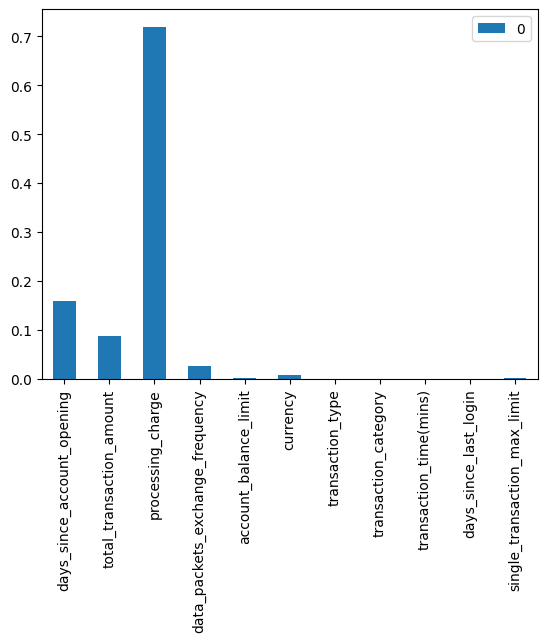

In [191]:
pd.DataFrame(data = rfc.feature_importances_, index = X_train.columns).plot(kind = 'bar')

In [192]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, f1_score

In [194]:
f1_score(y_train,rfc.predict(X_train_scaled))

0.6718974761344317

In [196]:
precision_score(y_train,RF.predict(X_train_scaled))

0.594263243118205

In [197]:
recall_score(y_train, rfc.predict(X_train_scaled))

0.7728640192539109